Simulando: Escenario 1
Escenario 1 - R₀ = 5 × 0.5 × 14 = 35.00
Persona 81 infectada en t=0
Persona 14 infectada en t=0
Persona 3 infectada en t=0
Persona 75 infectada en t=1
Persona 11 infectada en t=1
Persona 27 infectada en t=1
Persona 29 infectada en t=1
Persona 64 infectada en t=1
Persona 71 infectada en t=1
Persona 25 infectada en t=1
Persona 91 infectada en t=1
Persona 83 infectada en t=1
Persona 89 infectada en t=1
Persona 69 infectada en t=1
Persona 53 infectada en t=1
Persona 28 infectada en t=1
Persona 10 infectada en t=2
Persona 70 infectada en t=2
Persona 37 infectada en t=2
Persona 46 infectada en t=2
Persona 73 infectada en t=2
Persona 24 infectada en t=2
Persona 98 infectada en t=2
Persona 58 infectada en t=2
Persona 47 infectada en t=2
Persona 45 infectada en t=2
Persona 26 infectada en t=2
Persona 87 infectada en t=2
Persona 9 infectada en t=2
Persona 68 infectada en t=2
Persona 20 infectada en t=2
Persona 41 infectada en t=2
Persona 99 infectada en t=2
Persona 7 infec

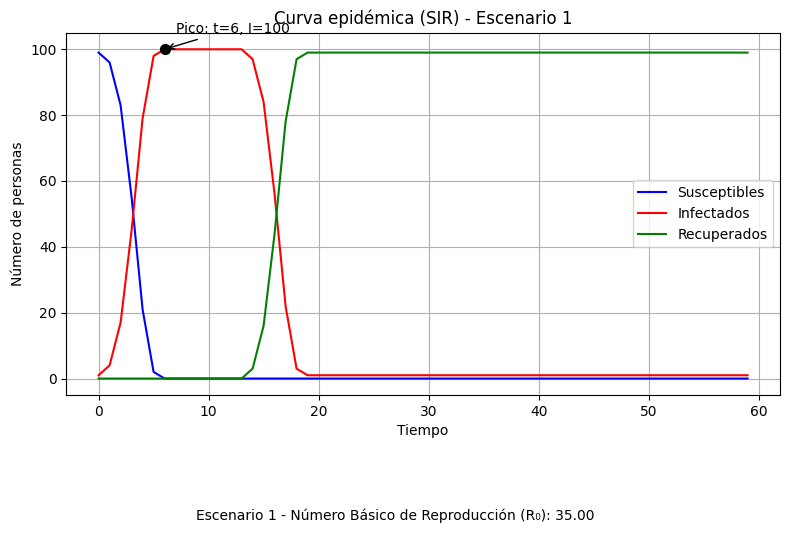

Simulando: Escenario 2
Escenario 2 - R₀ = 4 × 0.3 × 15 = 18.00
Persona 81 infectada en t=0
Persona 14 infectada en t=0
Persona 3 infectada en t=1
Persona 29 infectada en t=1
Persona 77 infectada en t=1
Persona 27 infectada en t=2
Persona 97 infectada en t=2
Persona 5 infectada en t=2
Persona 48 infectada en t=2
Persona 37 infectada en t=2
Persona 79 infectada en t=2
Persona 87 infectada en t=3
Persona 40 infectada en t=3
Persona 72 infectada en t=3
Persona 83 infectada en t=3
Persona 18 infectada en t=3
Persona 17 infectada en t=3
Persona 71 infectada en t=3
Persona 95 infectada en t=3
Persona 46 infectada en t=3
Persona 65 infectada en t=3
Persona 19 infectada en t=3
Persona 93 infectada en t=4
Persona 62 infectada en t=4
Persona 16 infectada en t=4
Persona 67 infectada en t=4
Persona 69 infectada en t=4
Persona 88 infectada en t=4
Persona 39 infectada en t=4
Persona 31 infectada en t=4
Persona 28 infectada en t=4
Persona 70 infectada en t=4
Persona 80 infectada en t=4
Persona 8 infec

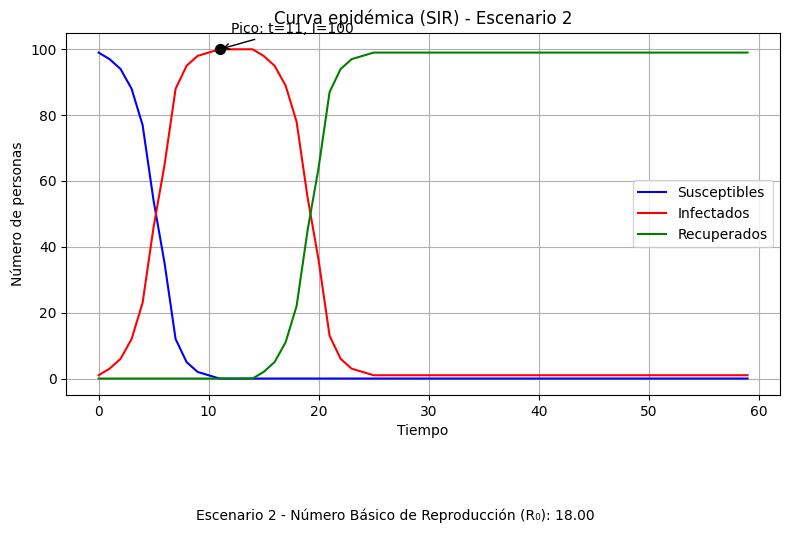

Simulando: Escenario 3
Escenario 3 - R₀ = 1 × 0.2 × 10 = 2.00
Persona 81 infectada en t=0
Persona 35 infectada en t=1
Persona 86 infectada en t=2
Persona 11 infectada en t=3
Persona 27 infectada en t=3
Persona 53 infectada en t=4
Persona 19 infectada en t=5
Persona 48 infectada en t=6
Persona 10 infectada en t=6
Persona 20 infectada en t=7
Persona 59 infectada en t=8
Persona 28 infectada en t=8
Persona 17 infectada en t=9
Persona 31 infectada en t=9
Persona 95 infectada en t=9
Persona 76 infectada en t=10
Persona 14 infectada en t=10
Persona 64 infectada en t=11
Persona 67 infectada en t=11
Persona 70 infectada en t=12
Persona 96 infectada en t=12
Persona 42 infectada en t=13
Persona 9 infectada en t=13
Persona 92 infectada en t=13
Persona 68 infectada en t=14
Persona 56 infectada en t=14
Persona 71 infectada en t=15
Persona 91 infectada en t=15
Persona 62 infectada en t=15
Persona 74 infectada en t=15
Persona 40 infectada en t=16
Persona 16 infectada en t=16
Persona 58 infectada en t=

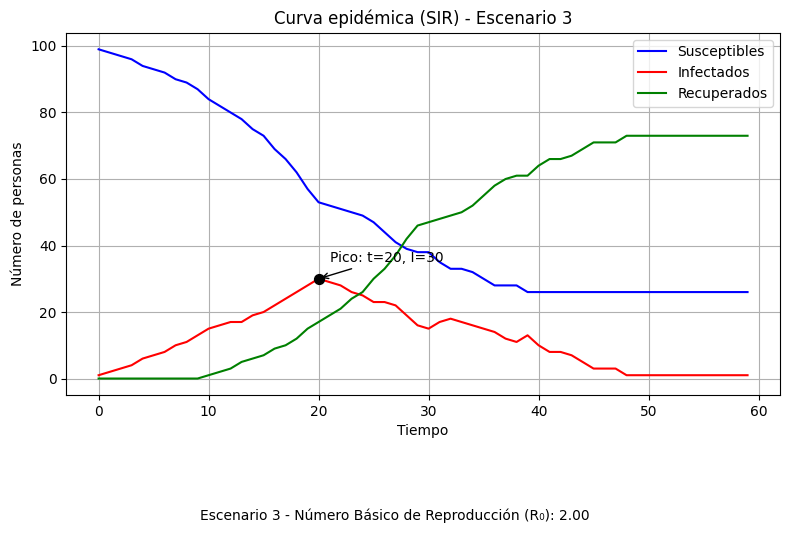

In [2]:
import simpy
import random
import matplotlib.pyplot as plt

class Persona:
    def __init__(self, env, id, infect_prob, rec_time):
        self.env = env
        self.id = id
        self.estado = "S"
        self.infect_prob = infect_prob
        self.rec_time = rec_time
        self.en_proceso = False

    def infectar(self):
        if self.estado == "S" and not self.en_proceso:
            self.en_proceso = True
            if random.random() < self.infect_prob:
                self.estado = "I"
                print(f"Persona {self.id} infectada en t={self.env.now}")
                yield self.env.timeout(self.rec_time)
                self.estado = "R"
            self.en_proceso = False


def simulacion(env, nombre, infect, infect_prob, rec_time, num_personas=100, duracion=30):
    personas = [Persona(env, i, infect_prob, rec_time) for i in range(num_personas)]
    personas[0].estado = "I"

    tiempos = []
    susceptibles = []
    infectados = []
    recuperados = []

    while env.now < duracion:
        for persona in personas:
            if persona.estado == "I":
                vecinos = random.sample(personas, infect)
                for vecino in vecinos:
                    env.process(vecino.infectar())

        s = sum(p.estado == "S" for p in personas)
        i = sum(p.estado == "I" for p in personas)
        r = sum(p.estado == "R" for p in personas)

        tiempos.append(env.now)
        susceptibles.append(s)
        infectados.append(i)
        recuperados.append(r)

        yield env.timeout(1)

    # ======= Gráfica 1: Curva epidémica (S, I, R vs tiempo) =======
    plt.figure(figsize=(8, 5))
    plt.plot(tiempos, susceptibles, label="Susceptibles", color="blue")
    plt.plot(tiempos, infectados, label="Infectados", color="red")
    plt.plot(tiempos, recuperados, label="Recuperados", color="green")
    plt.xlabel("Tiempo")
    plt.ylabel("Número de personas")
    plt.title(f"Curva epidémica (SIR) - {nombre}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # ======= Encontrar el pico de infección =======
    pico_idx = max(range(len(infectados)), key=lambda idx: infectados[idx])
    tiempo_pico = tiempos[pico_idx]
    valor_pico = infectados[pico_idx]

    # Marcar el pico en la misma gráfica
    plt.scatter([tiempo_pico], [valor_pico], color="black", s=50, zorder=5)
    plt.annotate(
        f"Pico: t={tiempo_pico}, I={valor_pico}",
        xy=(tiempo_pico, valor_pico),
        xytext=(tiempo_pico + 1, valor_pico + 5),
        arrowprops=dict(arrowstyle="->", color="black")
    )
     # ======= Mostrar R0 debajo del gráfico =======
    r0 = infect * infect_prob * rec_time
    plt.figtext(0.5, -0.05, f"{nombre} - Número Básico de Reproducción (R₀): {r0:.2f}", 
                wrap=True, horizontalalignment='center', fontsize=10)

    plt.subplots_adjust(bottom=0.2)  # Ajustar para dejar espacio al texto
    plt.show()



# ========== Definición de escenarios ==========
escenarios = [
    {"nombre": "Escenario 1", "infect": 5, "infect_prob": 0.5, "rec_time": 14},
    {"nombre": "Escenario 2", "infect": 4, "infect_prob": 0.3, "rec_time": 15},
    {"nombre": "Escenario 3", "infect": 1, "infect_prob": 0.2, "rec_time": 10},
    
]



# ========== Ejecutar simulaciones una por una ==========
for escenario in escenarios:
    print(f"Simulando: {escenario['nombre']}")
    random.seed(42)  # reproducibilidad
    env = simpy.Environment()
    env.process(simulacion(
        env,
        escenario["nombre"],
        escenario["infect"],
        escenario["infect_prob"],
        escenario["rec_time"],
        num_personas=100,
        duracion=60
    ))
    r0 = escenario["infect"] * escenario["infect_prob"] * escenario["rec_time"]
    print(f"{escenario['nombre']} - R₀ = {escenario['infect']} × {escenario['infect_prob']} × {escenario['rec_time']} = {r0:.2f}")

    env.run()

